In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np


In [7]:
df = pd.read_csv("data/df_meam_params.csv", index_col=0)
df = df.set_index(["model","species"])
# get list of meam params
param_list = df.columns.to_list()[0:37]
df = df.reset_index()

In [8]:
# property list to explore
prop_list = ['lattice_constant_fcc', 'bulk_modulus_fcc',
            'c44_fcc', 'c12_fcc', 'c11_fcc',
            'cohesive_energy_fcc', 'thermal_expansion_coeff_fcc',
            'surface_energy_100_fcc',
            'extr_stack_fault_energy_fcc', 'intr_stack_fault_energy_fcc',
            'unstable_stack_energy_fcc', 'unstable_twinning_energy_fcc',
            'relaxed_formation_potential_energy_fcc',
            'unrelaxed_formation_potential_energy_fcc',
            'vacancy_migration_energy_fcc', 
            'relaxation_volume_fcc'
            ]

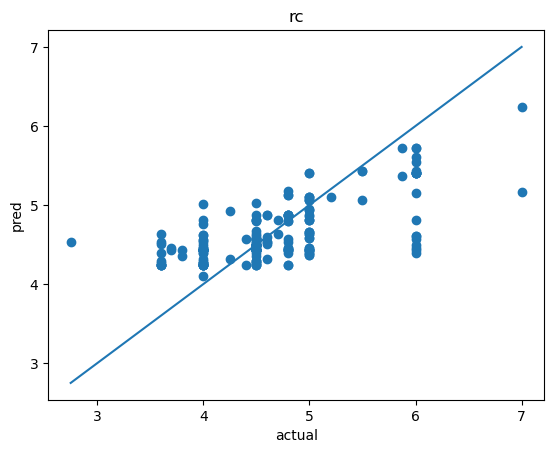

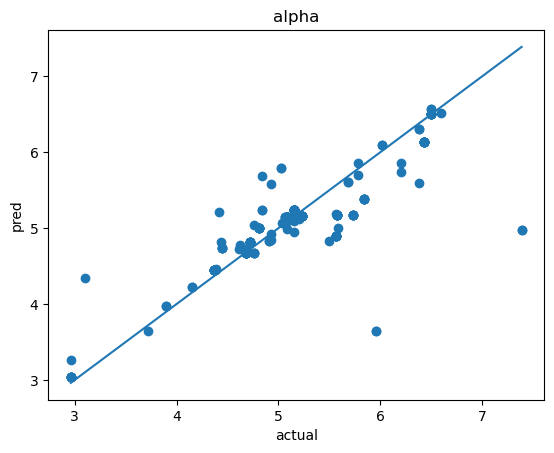

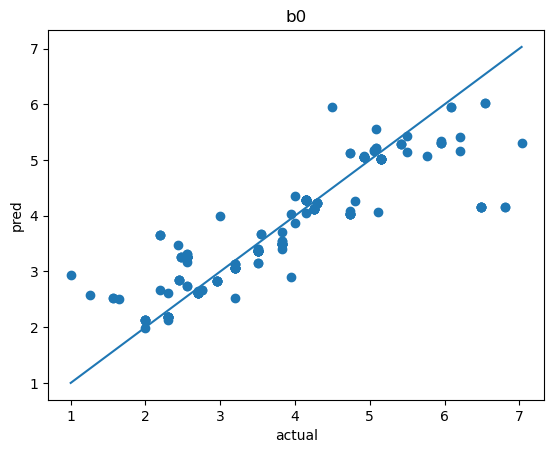

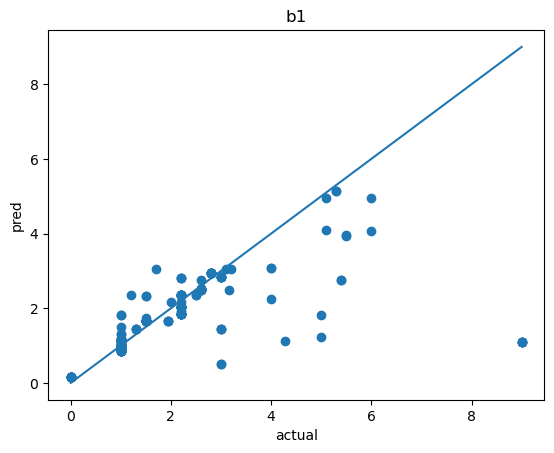

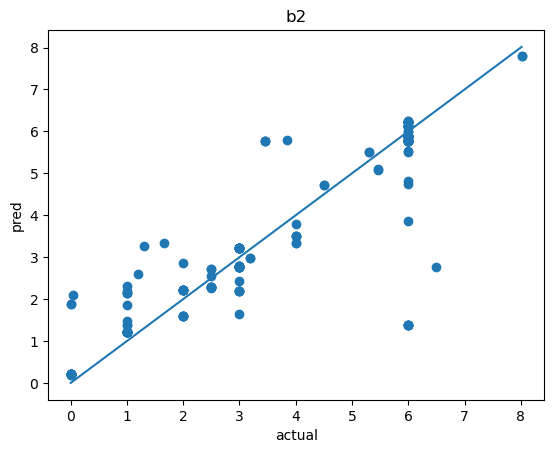

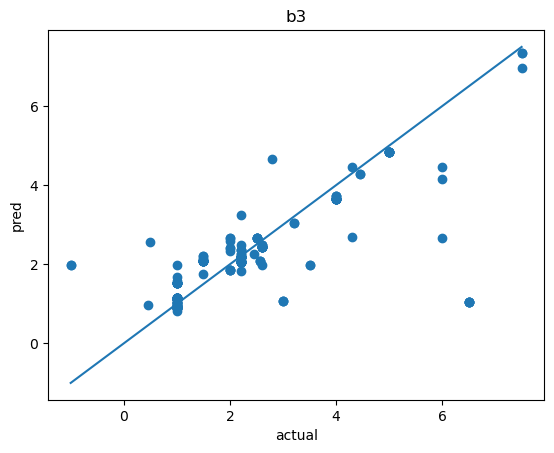

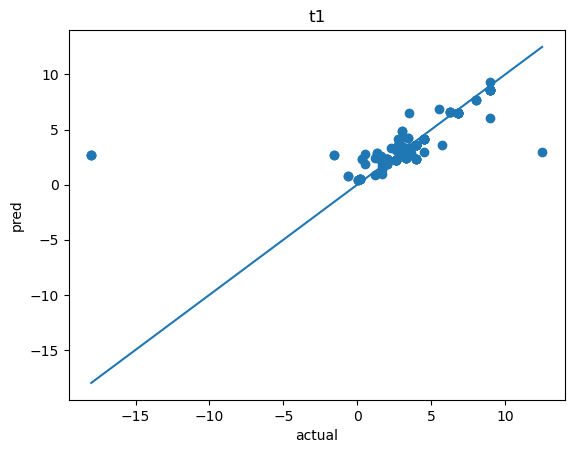

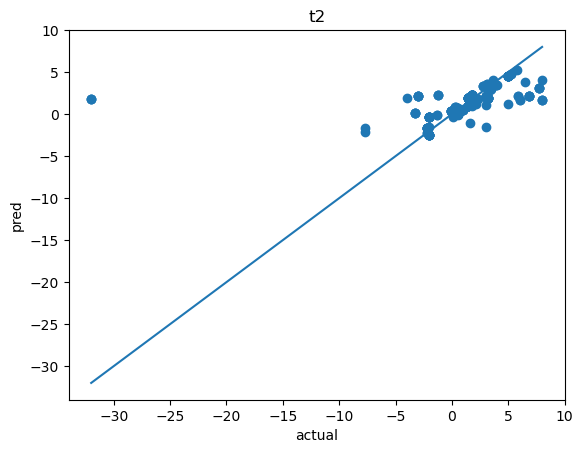

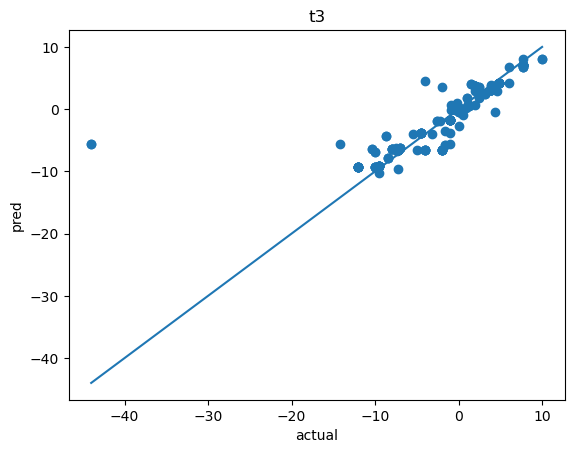

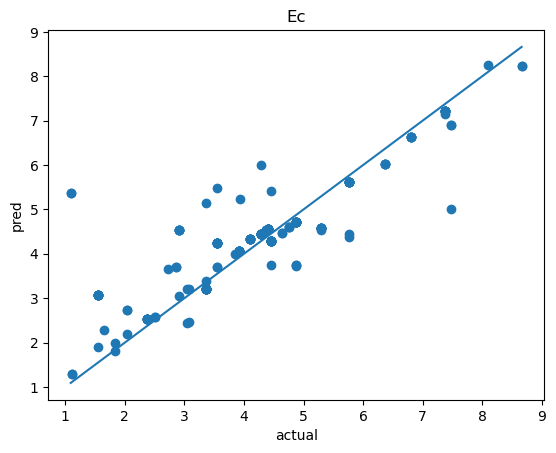

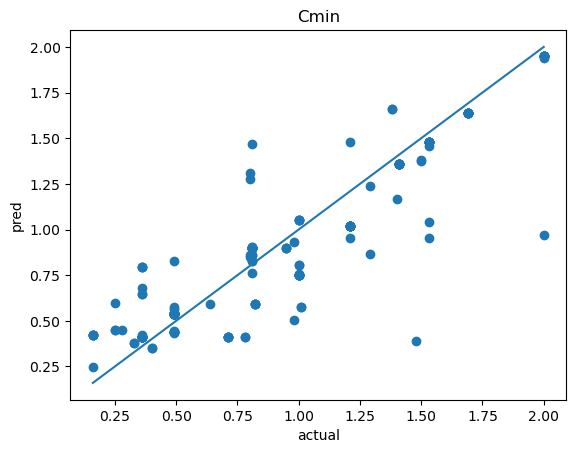

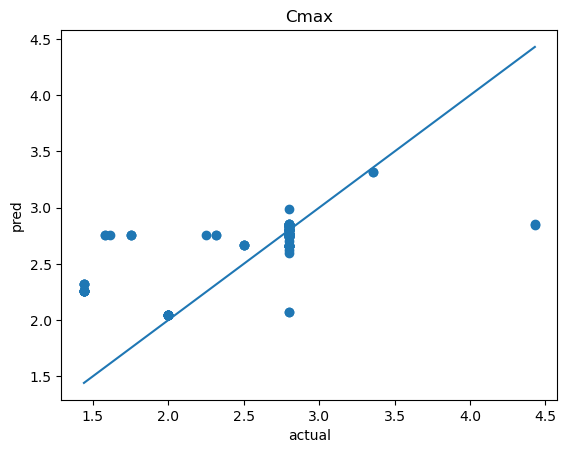

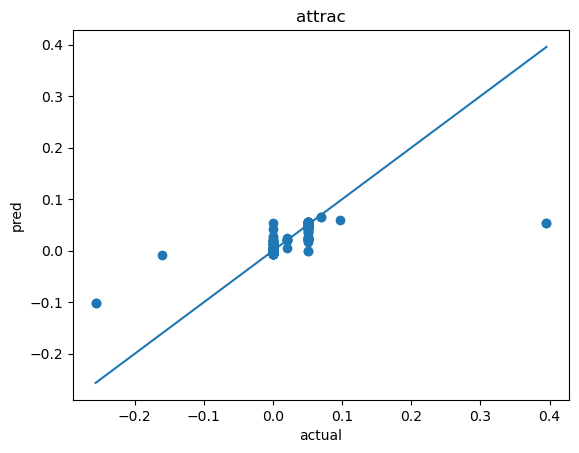

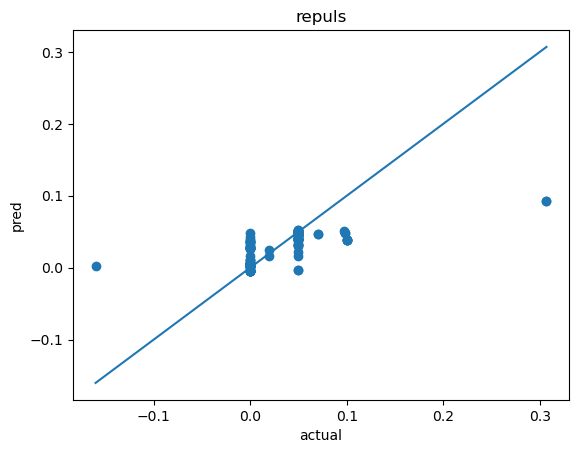

In [9]:
xvars = ['z','ielement','atwt','alat','re']
yvars = ['rc','alpha','b0','b1','b2','b3','t1','t2','t3','Ec', 'Cmin','Cmax','attrac','repuls']
#sns.pairplot(data = df, x_vars = xvars, y_vars = yvars, hue = 'species',height=1.0)

for yvar in yvars:
    all_vars = xvars + [yvar] + ['species']
    df_current = df[all_vars].copy()
    df_current = df_current.dropna()
    X = df_current[xvars]
    y = df_current[yvar]
    imput = KNNImputer(n_neighbors=2, weights="uniform",
                       keep_empty_features=True)
    pca = PCA()
    model = svm.SVR(kernel='rbf')

    pipe = Pipeline(steps=[('scale', StandardScaler()),
                        ('imp', imput),
                        ('pca', pca),
                        ('lr', model)])
    pipe = TransformedTargetRegressor(regressor=pipe,
                                    transformer=StandardScaler())
    pipe.fit(X,y)
    ypred = pipe.predict(X)
    plt.figure()
    #sns.scatterplot(data = df_current,x=y,y=ypred,hue='species')
    plt.scatter(y,ypred)
    plt.plot([min(y),max(y)],[min(y),max(y)])
    plt.xlabel('actual')
    plt.ylabel('pred')
    plt.title(yvar)

In [10]:
for i, prop in enumerate(prop_list):
    print(f"{prop}: {i+1} of {len(prop_list)}")
    to_compare = param_list.copy()
    to_compare.extend(['species', prop])
    prop_corr = df[to_compare].corr(numeric_only = True)[prop].sort_values(ascending=False)
    to_plot = prop_corr.index[0:5].to_list()
    to_plot.append("species")
    fig = sns.pairplot(data = df[to_plot], hue='species', corner = 'true')
    fig.savefig(f"./experiments/prop_correlations/{prop}.png")
    plt.close()

lattice_constant_fcc: 1 of 16


/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

bulk_modulus_fcc: 2 of 16


/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

c44_fcc: 3 of 16


/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

c12_fcc: 4 of 16


/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

c11_fcc: 5 of 16


/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

cohesive_energy_fcc: 6 of 16


/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

thermal_expansion_coeff_fcc: 7 of 16


/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

surface_energy_100_fcc: 8 of 16


/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

extr_stack_fault_energy_fcc: 9 of 16


/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

intr_stack_fault_energy_fcc: 10 of 16


/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

unstable_stack_energy_fcc: 11 of 16


/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

unstable_twinning_energy_fcc: 12 of 16


/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

relaxed_formation_potential_energy_fcc: 13 of 16


/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

unrelaxed_formation_potential_energy_fcc: 14 of 16


/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

vacancy_migration_energy_fcc: 15 of 16


/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

relaxation_volume_fcc: 16 of 16


/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jaspers2/anaconda3/envs/pytorch_ip/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

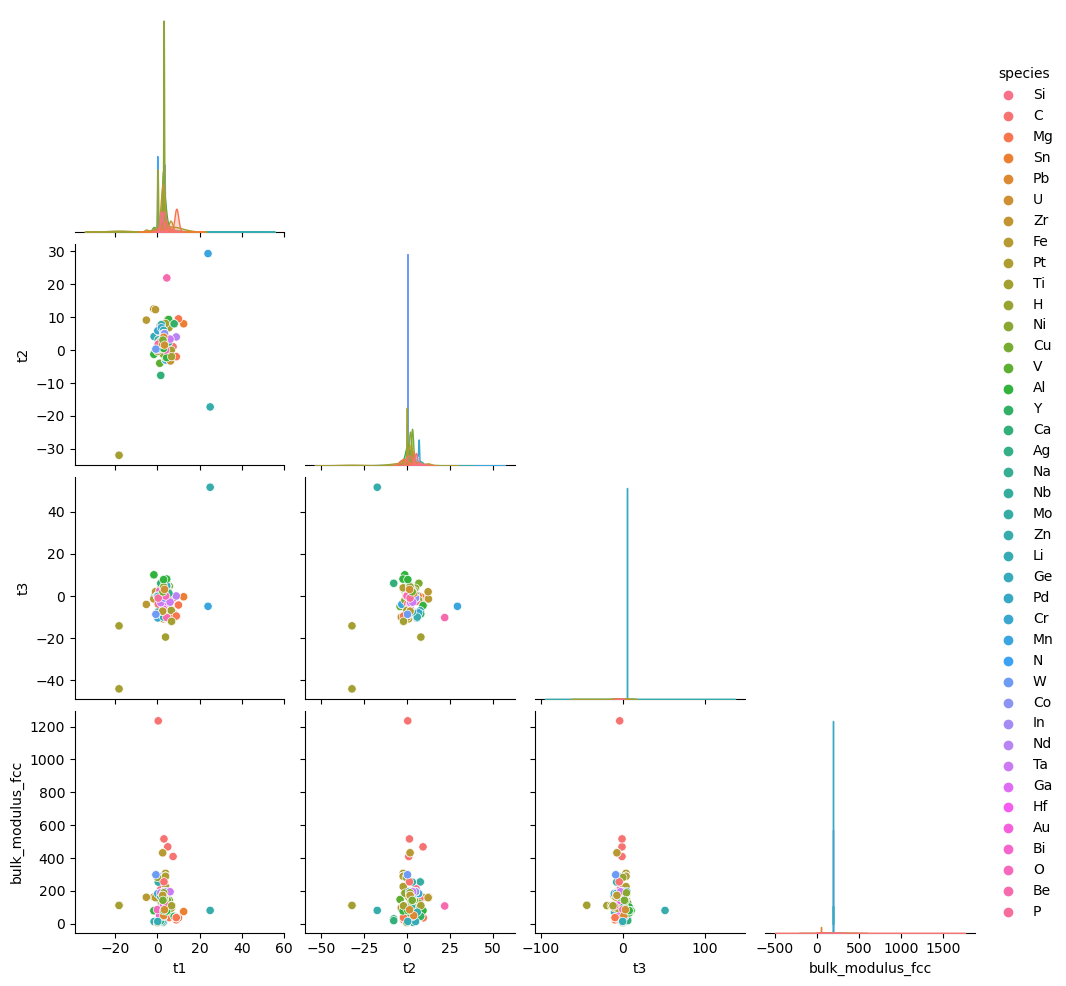

In [11]:
current = ['t1','t2','t3','bulk_modulus_fcc','species']
sns.pairplot(data = df[current], hue='species', corner = 'true')

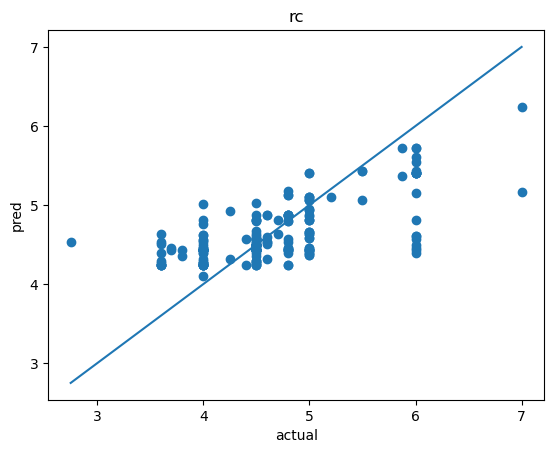

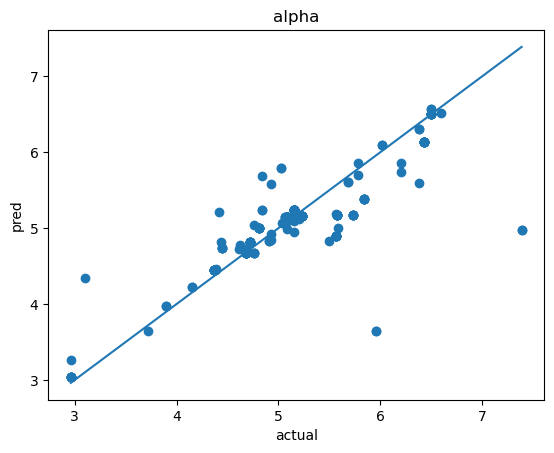

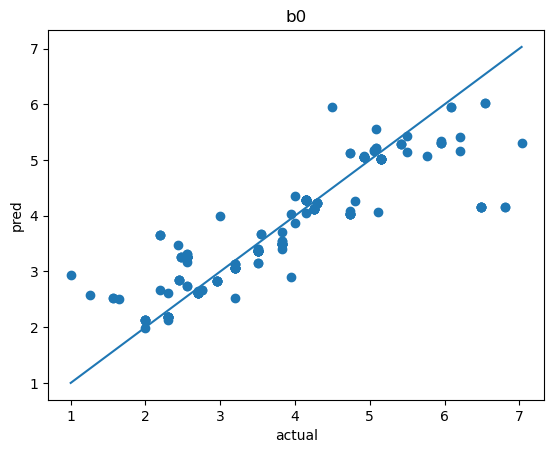

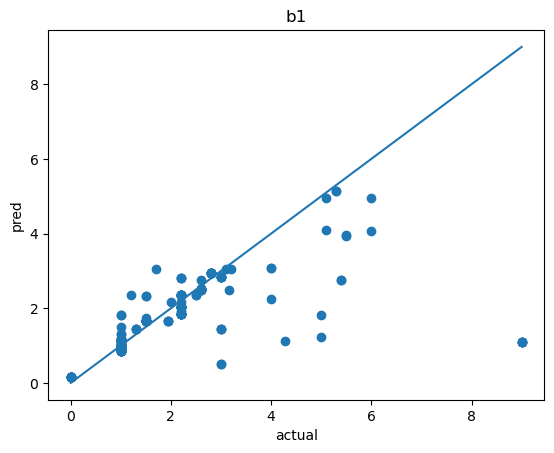

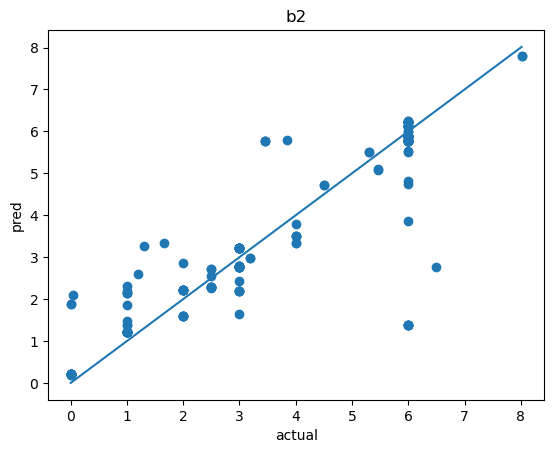

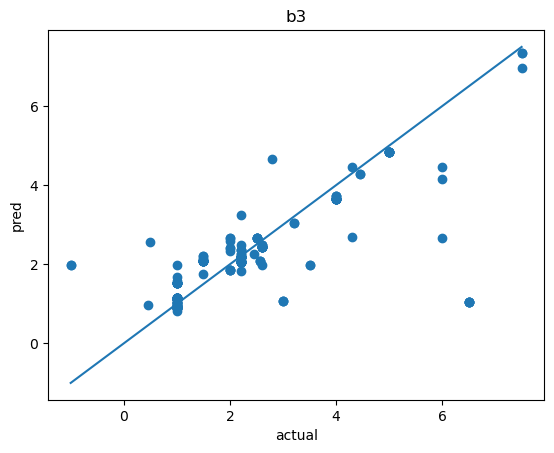

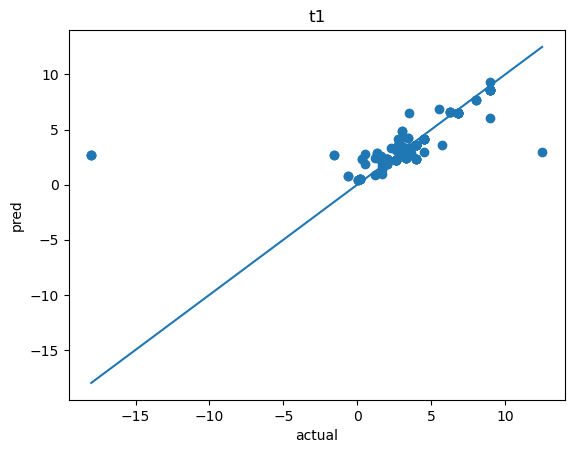

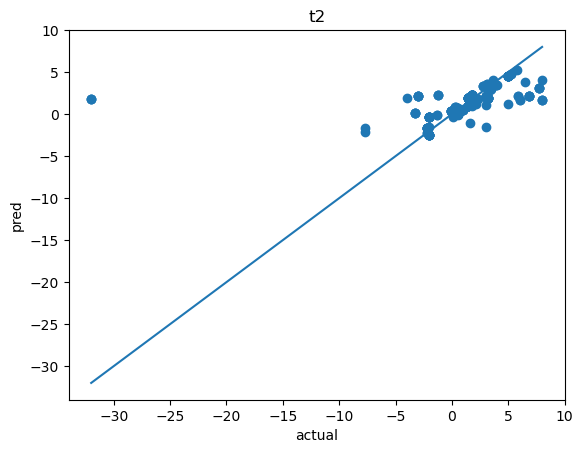

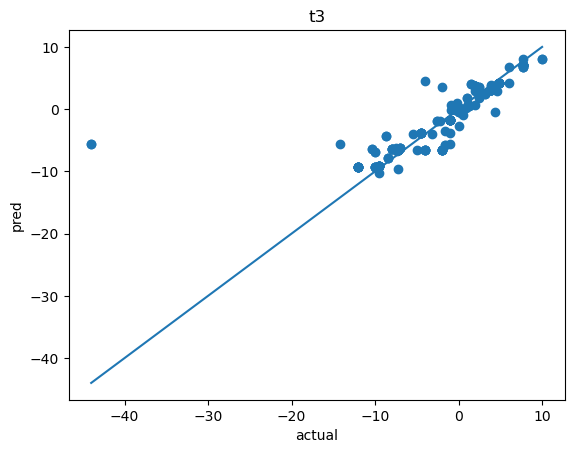

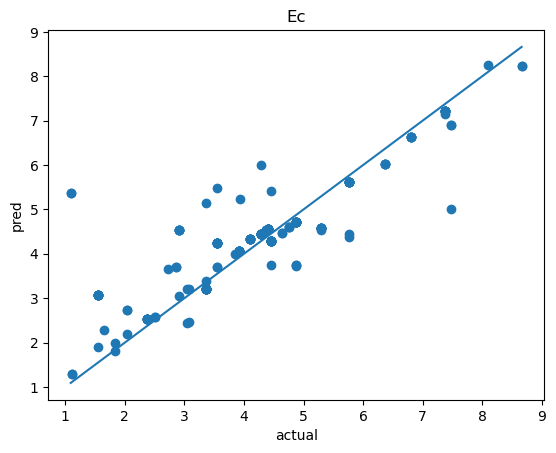

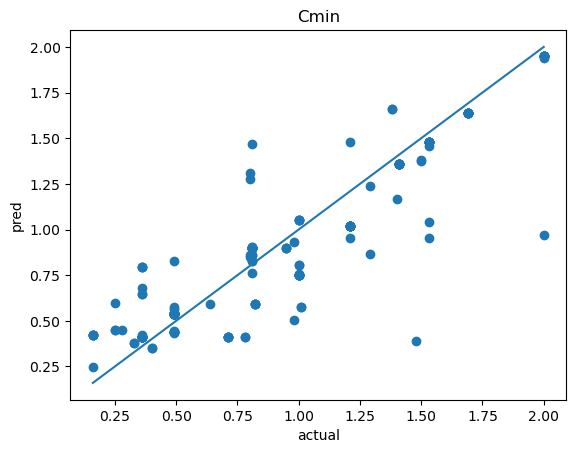

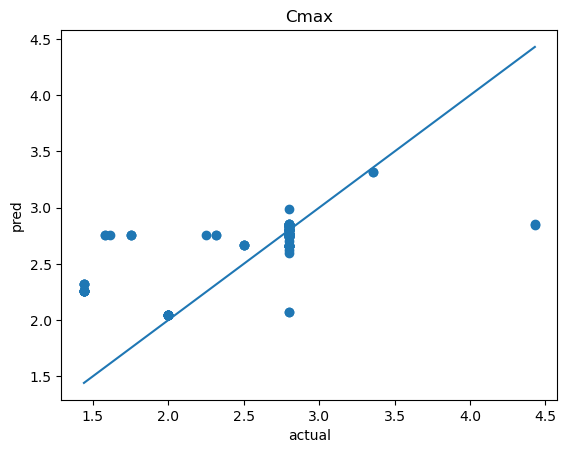

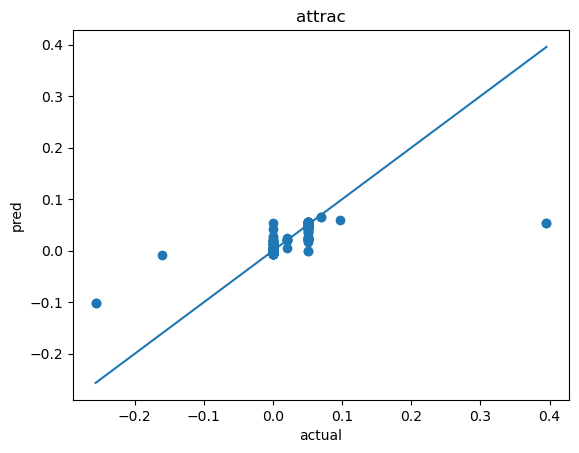

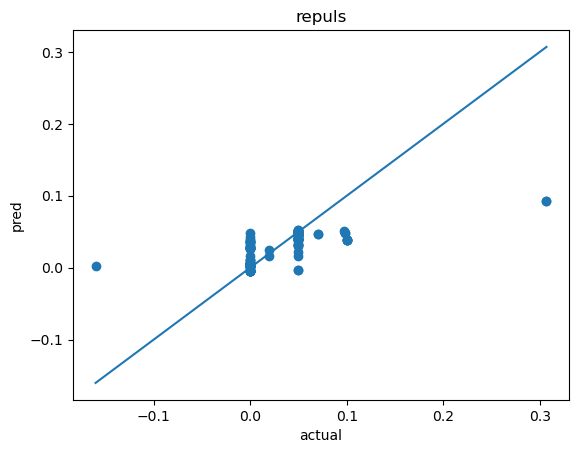

In [12]:
input_vars = []
#sns.pairplot(data = df, x_vars = xvars, y_vars = yvars, hue = 'species',height=1.0)

for yvar in yvars:
    all_vars = xvars + [yvar] + ['species']
    df_current = df[all_vars].copy()
    df_current = df_current.dropna()
    X = df_current[xvars]
    y = df_current[yvar]
    imput = KNNImputer(n_neighbors=2, weights="uniform",
                       keep_empty_features=True)
    pca = PCA()
    model = svm.SVR(kernel='rbf')

    pipe = Pipeline(steps=[('scale', StandardScaler()),
                        ('imp', imput),
                        ('pca', pca),
                        ('lr', model)])
    pipe = TransformedTargetRegressor(regressor=pipe,
                                    transformer=StandardScaler())
    pipe.fit(X,y)
    ypred = pipe.predict(X)
    plt.figure()
    #sns.scatterplot(data = df_current,x=y,y=ypred,hue='species')
    plt.scatter(y,ypred)
    plt.plot([min(y),max(y)],[min(y),max(y)])
    plt.xlabel('actual')
    plt.ylabel('pred')
    plt.title(yvar)